# Missing value imputation: ArbitraryNumberImputer


ArbitraryNumberImputer replaces NA by an arbitrary value. It works for numerical variables. The arbitrary value needs to be defined by the user.

When no variable list is passed, it will default to all numerical variables in the dataset.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.imputation  import ArbitraryNumberImputer

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# let's create an instance of the imputer where we impute
# 2 variables with the same arbitraty number

arbitrary_imputer = ArbitraryNumberImputer(
    arbitrary_number=-999, variables=['LotFrontage', 'MasVnrArea'])


arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [5]:
# the number to use in the imputation
arbitrary_imputer.arbitrary_number

-999

In [6]:
# the imputer will use the same value in all the
# indicated variables

arbitrary_imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999}

In [7]:
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -999.0
MasVnrArea    -999.0
dtype: float64

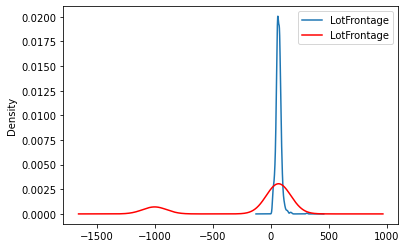

In [8]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary value

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Passing a dictionary with variable names and values

In [9]:
# we can also impute different variables with different values

arbitrary_imputer = ArbitraryNumberImputer(
    imputer_dict={"LotFrontage":-678,"MasVnrArea":-789}
)

arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'LotFrontage': -678, 'MasVnrArea': -789},
                       variables=dict_keys(['LotFrontage', 'MasVnrArea']))

In [10]:
arbitrary_imputer.imputer_dict_

{'LotFrontage': -678, 'MasVnrArea': -789}

In [11]:
# now we impute the missing data

train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -678.0
MasVnrArea    -789.0
dtype: float64

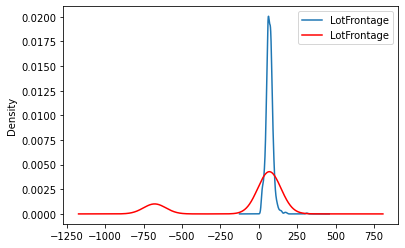

In [12]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary value

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')